In [21]:
pip install tensorflow


In [22]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [24]:
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[numerical_columns])

In [26]:
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

In [27]:
look_back = 24
X, Y = create_dataset(scaled_data, look_back)


In [28]:
X_train, X_test = X[:-24], X[-24:]
Y_train, Y_test = Y[:-24], Y[-24:]

In [29]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [30]:
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


In [ ]:
model.fit(X_train, Y_train, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
11005/11005 - 26s - loss: 0.0000e+00 - 26s/epoch - 2ms/step
Epoch 2/20
11005/11005 - 21s - loss: 0.0000e+00 - 21s/epoch - 2ms/step
Epoch 3/20
11005/11005 - 23s - loss: 0.0000e+00 - 23s/epoch - 2ms/step
Epoch 4/20
11005/11005 - 22s - loss: 0.0000e+00 - 22s/epoch - 2ms/step
Epoch 5/20
11005/11005 - 24s - loss: 0.0000e+00 - 24s/epoch - 2ms/step
Epoch 6/20
11005/11005 - 23s - loss: 0.0000e+00 - 23s/epoch - 2ms/step
Epoch 7/20
11005/11005 - 21s - loss: 0.0000e+00 - 21s/epoch - 2ms/step
Epoch 8/20


In [33]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

1/1 [==============================] - 0s 25ms/step


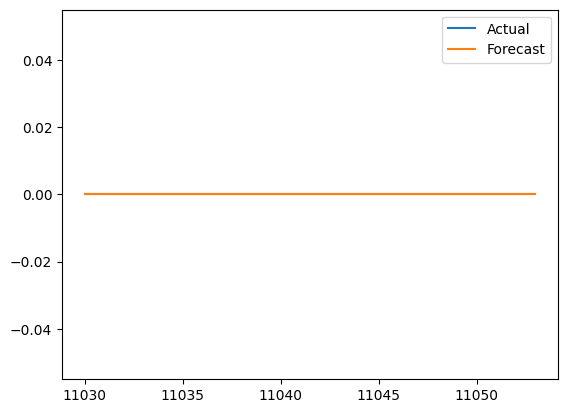

In [47]:
plt.plot(df.index[-24:], Y_test[-24:], label='Actual')  # Plot the last 24 elements
plt.plot(df.index[-24:], test_predict, label='Forecast')
plt.legend()
plt.show()